# Exploration

This notebook contain the steps need to recreate exploration phase of data science pipeline. 

---
### Required imports
Everything we need to run the code blocks in this notebook are located in the top level directory. To run the code blocks in this report you will need numpy, pandas, matplotlib, seaborn, sklearn, and the wrangle file we just made.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from wrangle import *

import warnings
warnings.filterwarnings("ignore")


#Set the plot chart size and font size
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=12)

Using wrangle function import and clean data

In [2]:
df = clean_data()

Ensure the import worked

In [3]:
df

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote
0,013025,BIRMINGHAM,AL,Jefferson,4,All other conditions,346,0.0
1,013025,BIRMINGHAM,AL,Jefferson,4,Brain disease or condition (non-traumatic),150,0.0
2,013025,BIRMINGHAM,AL,Jefferson,4,Brain injury (traumatic),38,0.0
3,013025,BIRMINGHAM,AL,Jefferson,4,Hip or femur fracture,156,0.0
4,013025,BIRMINGHAM,AL,Jefferson,4,"Hip or knee replacement, amputation or other b...",329,0.0
...,...,...,...,...,...,...,...,...
10588,713027,LAFAYETTE,LA,Lafayette,6,"Hip or knee replacement, amputation or other b...",0,2.0
10589,713027,LAFAYETTE,LA,Lafayette,6,Nervous system disorder (excluding stroke),0,2.0
10590,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord disease or condition (non-traumatic),0,2.0
10591,713027,LAFAYETTE,LA,Lafayette,6,Spinal cord injury (traumatic),0,2.0


In [4]:
train, validate, test = wrangle(df)

data has been split
(5931, 69) (2543, 69) (2119, 69)


Start visualizing number of instances

<AxesSubplot:xlabel='cms_region', ylabel='number_of_instances'>

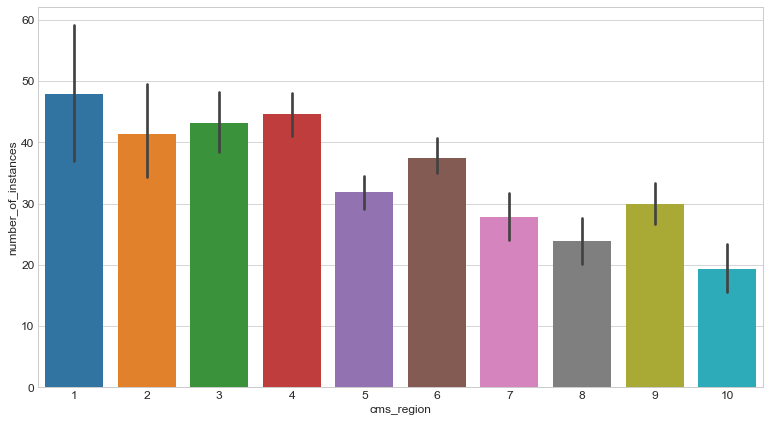

In [5]:
sns.barplot(data= train, y='number_of_instances', x='cms_region')

Instances vs State

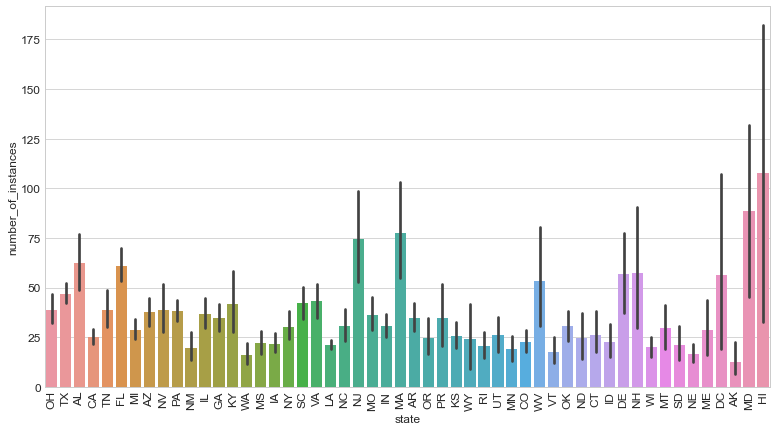

In [6]:
sns.barplot(data= train, y='number_of_instances', x='state')
plt.xticks(rotation=90)
plt.show()

Number of instances per region and condition

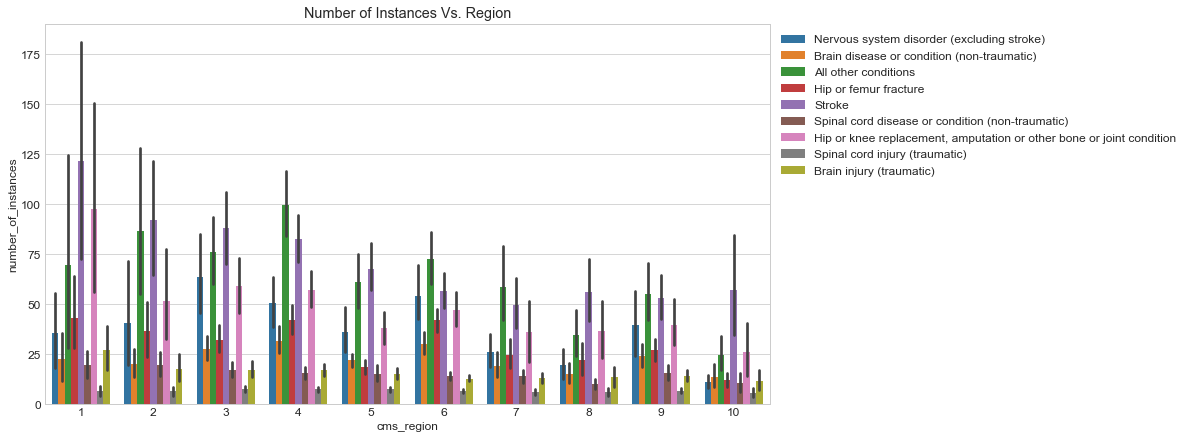

In [7]:
ax = sns.barplot(data= train, y='number_of_instances', x='cms_region', hue='condition')
plt.title('Number of Instances Vs. Region')
ax.legend(bbox_to_anchor=(1,1), loc='upper left')

Stroke and other conditions seem to have the highest condition

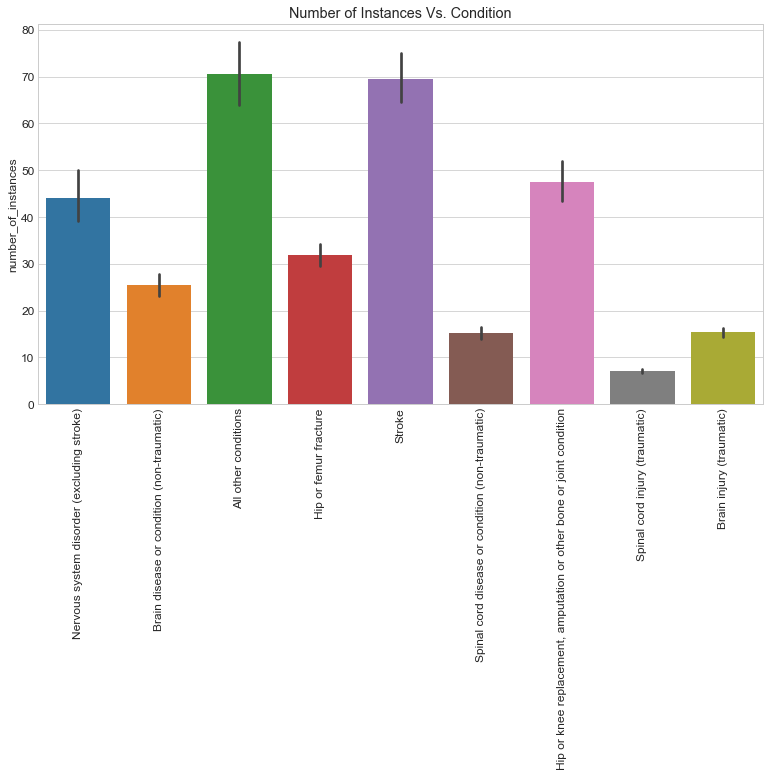

In [8]:
sns.barplot(data= train, y='number_of_instances', x='condition')
plt.title('Number of Instances Vs. Condition')
plt.xticks(rotation=90)
plt.xlabel('')
plt.show()

Stroke is the most ocurring condition, followed by all other conditions.
<p>Group dataframe by condition adding all instances.

In [9]:
train.groupby('condition').sum().sort_values(by=['number_of_instances'], ascending=False)

,number_of_instances,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,...,state_wy,condition_all_other_conditions,condition_brain_disease_or_condition_(non_traumatic),condition_brain_injury_(traumatic),condition_hip_or_femur_fracture,"condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition",condition_nervous_system_disorder_(excluding_stroke),condition_spinal_cord_disease_or_condition_(non_traumatic),condition_spinal_cord_injury_(traumatic),condition_stroke
condition,,,,,,,,,,,,,,,,,,,,,
All other conditions,46291,1.0,16.0,15.0,12.0,49.0,13.0,5.0,1.0,3.0,...,2.0,656.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stroke,45462,1.0,12.0,16.0,9.0,45.0,11.0,3.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,655.0
"Hip or knee replacement, amputation or other bone or joint condition",31712,0.0,7.0,13.0,13.0,48.0,10.0,3.0,1.0,2.0,...,2.0,0.0,0.0,0.0,0.0,669.0,0.0,0.0,0.0,0.0
Nervous system disorder (excluding stroke),29671,2.0,12.0,15.0,15.0,46.0,10.0,4.0,2.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,672.0,0.0,0.0,0.0
Hip or femur fracture,20798,1.0,13.0,13.0,11.0,54.0,12.0,3.0,1.0,1.0,...,1.0,0.0,0.0,0.0,653.0,0.0,0.0,0.0,0.0,0.0
Brain disease or condition (non-traumatic),16442,2.0,14.0,10.0,11.0,46.0,14.0,3.0,2.0,1.0,...,2.0,0.0,643.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brain injury (traumatic),10362,1.0,12.0,20.0,17.0,42.0,9.0,4.0,0.0,3.0,...,2.0,0.0,0.0,676.0,0.0,0.0,0.0,0.0,0.0,0.0
Spinal cord disease or condition (non-traumatic),10156,1.0,11.0,19.0,15.0,51.0,15.0,3.0,1.0,3.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,669.0,0.0,0.0
Spinal cord injury (traumatic),4470,2.0,8.0,12.0,14.0,52.0,6.0,3.0,1.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,638.0,0.0


Now let's get assign it to a variable to a dataframe with all data with stroke condition

In [10]:
stroke = train[(train.condition == 'Stroke')==True]

Verify it worked

In [11]:
stroke

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote,state_ak,state_al,...,state_wy,condition_all_other_conditions,condition_brain_disease_or_condition_(non_traumatic),condition_brain_injury_(traumatic),condition_hip_or_femur_fracture,"condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition",condition_nervous_system_disorder_(excluding_stroke),condition_spinal_cord_disease_or_condition_(non_traumatic),condition_spinal_cord_injury_(traumatic),condition_stroke
1718,103031,SARASOTA,FL,Sarasota,4,Stroke,232,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2870,14T228,ROCKFORD,IL,Winnebago,5,Stroke,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
6740,36T068,SYLVANIA,OH,Lucas,5,Stroke,100,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
9737,50T002,WALLA WALLA,WA,Walla Walla,10,Stroke,27,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4967,25T099,GREENWOOD,MS,Leflore,4,Stroke,16,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,15T002,GARY,IN,Lake,5,Stroke,56,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3779,193058,MONROE,LA,Ouachita,6,Stroke,27,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,04T002,CLARKSVILLE,AR,Johnson,6,Stroke,10,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3086,15T035,PORTAGE,IN,Porter,5,Stroke,30,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


Sort it by state and sort by number of instances.

In [12]:
stroke_state = stroke.groupby('state').sum().sort_values(by=['number_of_instances'], ascending=False)
stroke_state

,number_of_instances,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,...,state_wy,condition_all_other_conditions,condition_brain_disease_or_condition_(non_traumatic),condition_brain_injury_(traumatic),condition_hip_or_femur_fracture,"condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition",condition_nervous_system_disorder_(excluding_stroke),condition_spinal_cord_disease_or_condition_(non_traumatic),condition_spinal_cord_injury_(traumatic),condition_stroke
state,,,,,,,,,,,,,,,,,,,,,
TX,5041,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76
FL,2874,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
PA,2767,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
OH,2582,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
CA,2113,0,0,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
NY,2019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
IL,1937,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
VA,1457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
MI,1449,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25


State is the index so it only shows one column

In [13]:
stroke_state.columns

Index(['number_of_instances', 'state_ak', 'state_al', 'state_ar', 'state_az',
       'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de', 'state_fl',
       'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il', 'state_in',
       'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md', 'state_me',
       'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt', 'state_nc',
       'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm', 'state_nv',
       'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa', 'state_pr',
       'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut',
       'state_va', 'state_vt', 'state_wa', 'state_wi', 'state_wv', 'state_wy',
       'condition_all_other_conditions',
       'condition_brain_disease_or_condition_(non_traumatic)',
       'condition_brain_injury_(traumatic)', 'condition_hip_or_femur_fracture',
       'condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition',
       'condition

Reset the index

In [14]:
stroke_state = stroke_state.reset_index()

Now it shows two columns

In [15]:
stroke_state.columns

Index(['state', 'number_of_instances', 'state_ak', 'state_al', 'state_ar',
       'state_az', 'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de',
       'state_fl', 'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il',
       'state_in', 'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md',
       'state_me', 'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt',
       'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm',
       'state_nv', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa',
       'state_pr', 'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx',
       'state_ut', 'state_va', 'state_vt', 'state_wa', 'state_wi', 'state_wv',
       'state_wy', 'condition_all_other_conditions',
       'condition_brain_disease_or_condition_(non_traumatic)',
       'condition_brain_injury_(traumatic)', 'condition_hip_or_femur_fracture',
       'condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition',
       '

Visualize the dataframe

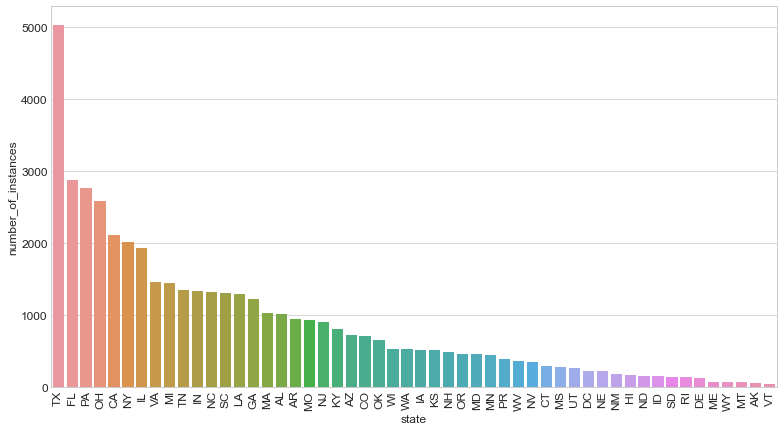

In [16]:
sns.barplot(data=stroke_state,x='state', y='number_of_instances')
plt.xticks(rotation=90)
plt.show()

Texas is the highest and Alaska the lowest

Our Next question is what city is the one with the largest. Let's get the stroke dataframe and select by state.

In [17]:
tx_stroke = stroke[(stroke.state == 'TX')==True]
tx_stroke

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote,state_ak,state_al,...,state_wy,condition_all_other_conditions,condition_brain_disease_or_condition_(non_traumatic),condition_brain_injury_(traumatic),condition_hip_or_femur_fracture,"condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition",condition_nervous_system_disorder_(excluding_stroke),condition_spinal_cord_disease_or_condition_(non_traumatic),condition_spinal_cord_injury_(traumatic),condition_stroke
9197,45T670,TOMBALL,TX,Harris,6,Stroke,26,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
10313,673049,NEW BRAUNFELS,TX,Comal,6,Stroke,50,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
9080,45T431,AUSTIN,TX,Travis,6,Stroke,187,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
10556,673078,SAN ANGELO,TX,Tom Green,6,Stroke,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
10151,673025,ALLEN,TX,Collin,6,Stroke,62,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,45TA62,LULING,TX,Caldwell,6,Stroke,14,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
10250,673041,SHERMAN,TX,Grayson,6,Stroke,35,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
8936,45T196,PARIS,TX,Lamar,6,Stroke,40,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
10439,673065,BRYAN,TX,Brazos,6,Stroke,111,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now let's group by city. Drop unneeded columns.

In [18]:
tx_city = tx_stroke.groupby('city').sum().sort_values(by=['number_of_instances'])
tx_city

,number_of_instances,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,...,state_wy,condition_all_other_conditions,condition_brain_disease_or_condition_(non_traumatic),condition_brain_injury_(traumatic),condition_hip_or_femur_fracture,"condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition",condition_nervous_system_disorder_(excluding_stroke),condition_spinal_cord_disease_or_condition_(non_traumatic),condition_spinal_cord_injury_(traumatic),condition_stroke
city,,,,,,,,,,,,,,,,,,,,,
SAN ANGELO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
SUGAR LAND,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
LULING,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
IRVING,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MISSION,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
VICTORIA,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
PALESTINE,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
THE WOODLANDS,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
LAKE JACKSON,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
tx_city.drop(columns=['state_ak', 'state_al', 'state_ar',
       'state_az', 'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de',
       'state_fl', 'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il',
       'state_in', 'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md',
       'state_me', 'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt',
       'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm',
       'state_nv', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa',
       'state_pr', 'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_ut', 
       'state_va', 'state_vt', 'state_wa', 'state_wi', 'state_wv', 'state_wy', 
       'condition_all_other_conditions',
       'condition_brain_disease_or_condition_(non_traumatic)',
       'condition_brain_injury_(traumatic)', 'condition_hip_or_femur_fracture',
       'condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition',
       'condition_nervous_system_disorder_(excluding_stroke)',
       'condition_spinal_cord_disease_or_condition_(non_traumatic)',
       'condition_spinal_cord_injury_(traumatic)'], inplace= True)


In [37]:
tx_city

,city,number_of_instances,state_tx,condition_stroke
0,SAN ANGELO,0,1,1
1,SUGAR LAND,10,1,1
2,LULING,14,1,1
3,IRVING,15,1,1
4,MISSION,15,1,1
5,VICTORIA,17,1,1
6,PALESTINE,18,1,1
7,THE WOODLANDS,20,2,2
8,LAKE JACKSON,22,1,1
9,SEGUIN,22,1,1


San Angelo is the lowest city and Houston is the highest.

Reset index to visualize

In [19]:
tx_city = tx_city.reset_index()

In [38]:
tx_city.columns

Index(['city', 'number_of_instances', 'state_tx', 'condition_stroke'], dtype='object')

We can visualize the 75 cities in Texas

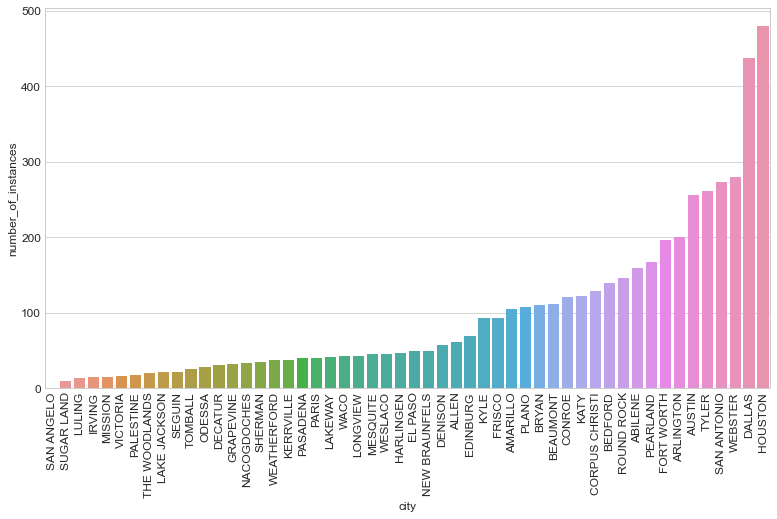

In [39]:
sns.barplot(data=tx_city, x='city', y='number_of_instances')
plt.xticks(rotation=90)
plt.show()

Now let's do the state with the least amount of instances.

In [40]:
ak_stroke = stroke[(stroke.state == 'AK')==True]
ak_stroke

,cms_certification_number_(ccn),city,state,county_name,cms_region,condition,number_of_instances,footnote,state_ak,state_al,...,state_wy,condition_all_other_conditions,condition_brain_disease_or_condition_(non_traumatic),condition_brain_injury_(traumatic),condition_hip_or_femur_fracture,"condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition",condition_nervous_system_disorder_(excluding_stroke),condition_spinal_cord_disease_or_condition_(non_traumatic),condition_spinal_cord_injury_(traumatic),condition_stroke
179,02T017,ANCHORAGE,AK,Anchorage,10,Stroke,55,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1


There is only one city so we will not visualize.

---
Now let's group by region and drop footnote column

In [23]:
stroke_region = stroke.groupby('cms_region').sum().sort_values(by=['number_of_instances'], ascending=False)
stroke_region

,number_of_instances,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,...,state_wy,condition_all_other_conditions,condition_brain_disease_or_condition_(non_traumatic),condition_brain_injury_(traumatic),condition_hip_or_femur_fracture,"condition_hip_or_knee_replacement,_amputation_or_other_bone_or_joint_condition",condition_nervous_system_disorder_(excluding_stroke),condition_spinal_cord_disease_or_condition_(non_traumatic),condition_spinal_cord_injury_(traumatic),condition_stroke
cms_region,,,,,,,,,,,,,,,,,,,,,
4,10166,0,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,123
5,8270,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,122
6,8116,0,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,143
3,5375,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,61
9,3351,0,0,0,9,45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,63
2,3320,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
7,2191,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
1,2071,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,17
8,1404,0,0,0,0,0,11,0,0,0,...,2,0,0,0,0,0,0,0,0,25


Region 4 is the highest and region 10 is the lowest.
<p>
Region 4 includes Alabama, Florida, Georgia, Kentucky, Mississippi, North Carolina, South Carolina, Tennessee.
<p>
Region 10 includes Alaska, Idaho, Oregon, Washington

Reset index and visualize.

In [24]:
stroke_region = stroke_region.reset_index()

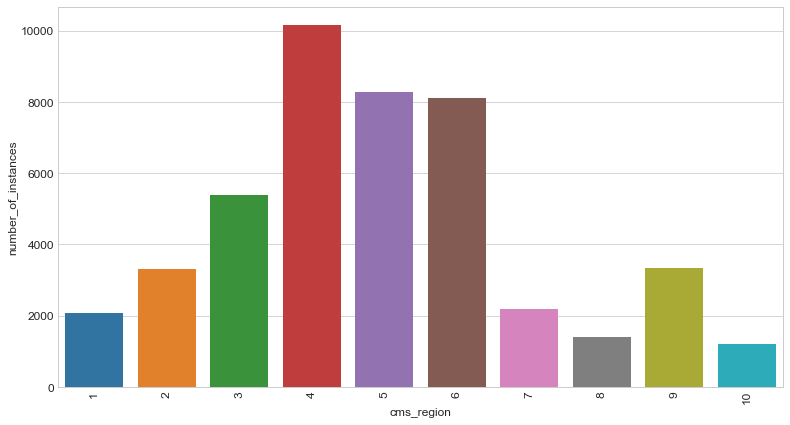

In [25]:
sns.barplot(data=stroke_region,x='cms_region', y='number_of_instances')
plt.xticks(rotation=90)
plt.show()

---
### Statistical test

We have two statistical tests to do:
- Is there a relationship between state and condition?
- Is there a relationship between region and condition?



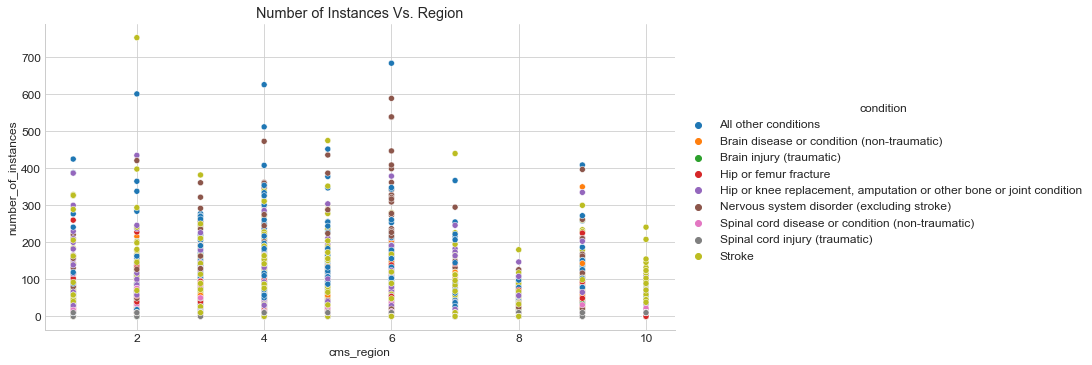

In [26]:
ax = sns.relplot(data= df, y='number_of_instances', x='cms_region', hue='condition', height=5, aspect=2)
plt.title('Number of Instances Vs. Region')
plt.show()

<Figure size 1440x576 with 0 Axes>

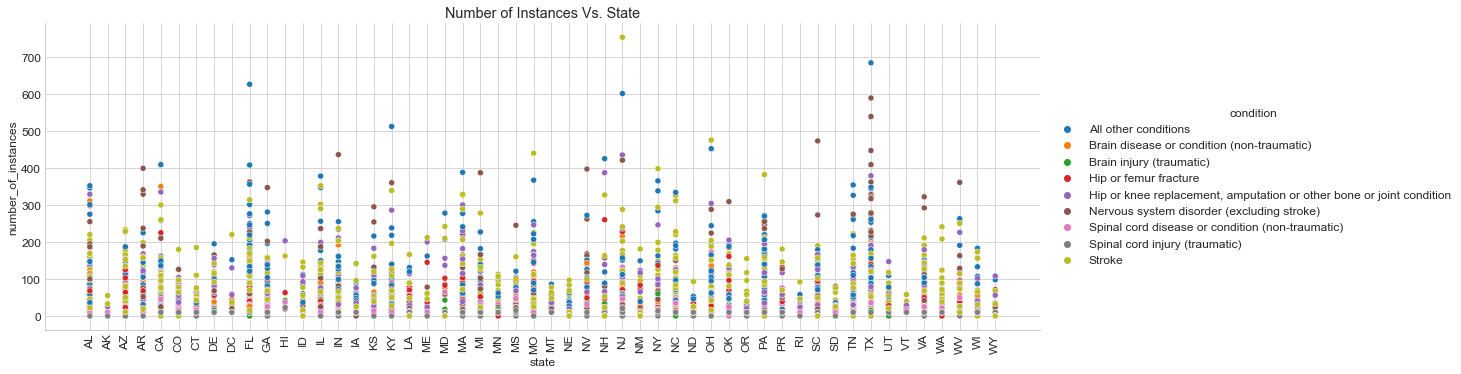

In [27]:
plt.figure(figsize=(20, 8))
sns.relplot(data=df, x='state', y='number_of_instances', hue='condition', height=5, aspect=3)
plt.title('Number of Instances Vs. State')
plt.xticks(rotation=90)
plt.show()

In [28]:
tx_cities = df[(df.state == 'TX')==True]
tx_cities = tx_cities.groupby(['city', 'condition']).sum()

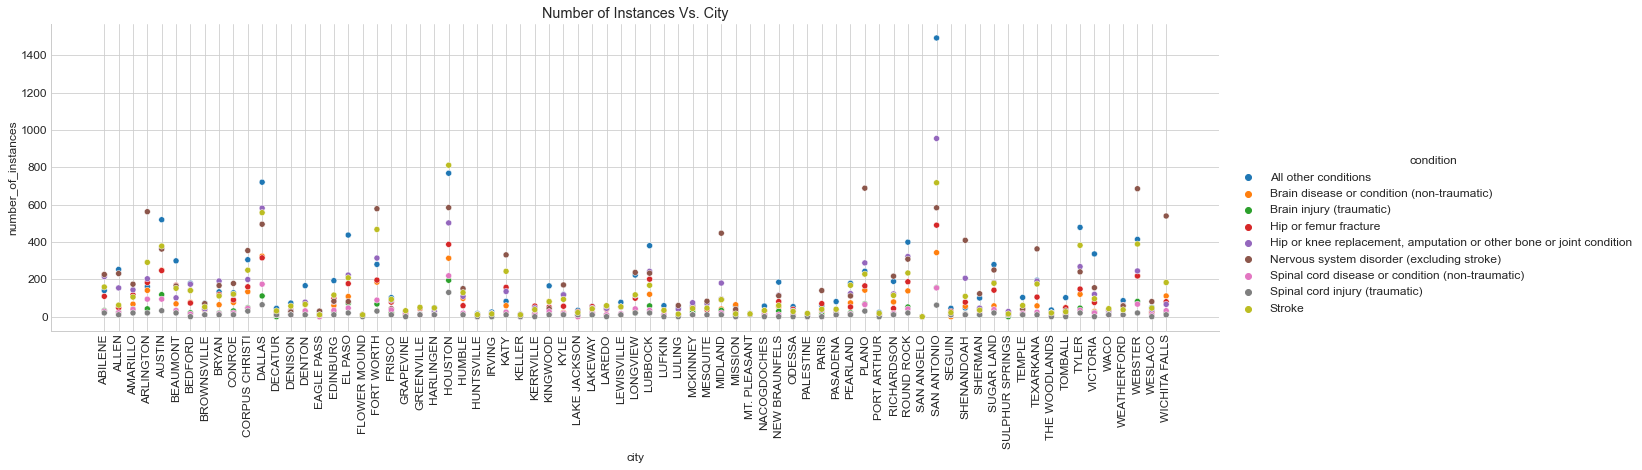

In [29]:
sns.relplot(data=tx_cities, x='city', y='number_of_instances', hue='condition', height=5, aspect=3.5)
plt.title('Number of Instances Vs. City')
plt.xticks(rotation=90)
plt.show()